## Importing all Dependencies

In [1]:
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import OneHotEncoder
print(tf.__version__)

1.14.0


## Importing Mnist dataset

In [2]:
data=tf.keras.datasets.mnist
(trainX,trainY),(testX,testY)=data.load_data()
trainX=np.array([x.ravel() for x in trainX])
testX=np.array([x.ravel() for x in testX])
trainX=trainX/255.0
testX=testX/255.0
one_hot=OneHotEncoder(sparse=False)
trainY=one_hot.fit_transform(trainY.reshape(len(trainY),1))
testY=one_hot.fit_transform(testY.reshape(len(testY),1))
print("Shape of Data: ")
print("Training Examles: ",trainX.shape)
print("Testing Examples: ",testX.shape)
img_size=(28,28)
pixels=784
num_of_classes=10
batch_size=100

Shape of Data: 
Training Examles:  (60000, 784)
Testing Examples:  (10000, 784)


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

## Helper Function for Plotting Images and graph

---



In [0]:
def plot_images(images, cls_true, cls_pred=None,w=3,h=3):
    assert len(images) == len(cls_true)==w*h
    fig, axes = plt.subplots(w, h)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i].reshape(img_size), cmap='binary')
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])
        ax.set_xlabel(xlabel)
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

In [0]:
def plot_graph(data):
    plt.plot(data)
    plt.show()

## Plotting Some of Images with their True Labels

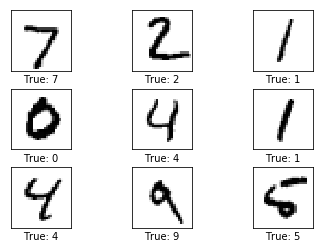

In [5]:
images=testX[0:9]
true_class=np.argmax(testY[0:9],axis=1)
plot_images(images,true_class)

## Initializing Graph Components (placeholders and variables)

In [0]:
x=tf.placeholder(tf.float32,[None,pixels])
y=tf.placeholder(tf.float32,[None,num_of_classes])
weight=tf.Variable(tf.truncated_normal([pixels,num_of_classes], stddev=0.1))
bias=tf.Variable(tf.truncated_normal([1,num_of_classes],stddev=0.1))

## Define Model 

In [0]:
y_pred=tf.matmul(x,weight)+bias
prediction=tf.nn.softmax(y_pred)

## Define Loss Function and accuracy

In [0]:
cross_entropy = tf.nn.softmax_cross_entropy_with_logits_v2(labels=y,logits=y_pred)
loss = tf.reduce_mean(cross_entropy)
accurate = tf.equal(tf.argmax(prediction,axis=1), tf.argmax(y,axis=1))
accuracy = tf.reduce_mean(tf.cast(accurate, tf.float32))

## Defining Gradient Descent Optimizer

In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(loss)

## Initialize Session and variables

In [0]:
session=tf.Session()
session.run(tf.global_variables_initializer())

In [0]:
feed_dict_test = {x: testX,y: testY}

## Helper Function to visualize and print accuracy

In [0]:
def print_accuracy():
    acc = session.run(accuracy, feed_dict=feed_dict_test)
    print("Accuracy on test-set: {0:.1%}".format(acc))

In [0]:
def print_confusion_matrix():
    prediction = session.run(y_pred, feed_dict=feed_dict_test)
    cls_true=np.argmax(prediction,axis=1)
    cm = confusion_matrix(y_true=np.argmax(testY,axis=1),y_pred=cls_true)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(num_of_classes)
    plt.xticks(tick_marks, range(num_of_classes))
    plt.yticks(tick_marks, range(num_of_classes))
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

## Train Function

In [0]:
def train(iterations):
    cost=[]
    for i in range(iterations):
        rnd_index=np.random.choice(len(trainX),batch_size)
        x_batch=trainX[rnd_index]
        y_batch=trainY[rnd_index]
        train_dict={x:x_batch,y:y_batch}
        session.run(optimizer,feed_dict=train_dict)
        if i % batch_size == 0:
            minibatch_loss, minibatch_accuracy = session.run([loss, accuracy],feed_dict={x: x_batch, y: y_batch})
            print("Iteration",str(i),"\t| Loss =",str(minibatch_loss),"\t| Accuracy =",str(minibatch_accuracy))
            cost.append(minibatch_loss)
    return np.array(cost)

In [15]:
print_accuracy()

Accuracy on test-set: 9.7%


Iteration 0 	| Loss = 1.8492727 	| Accuracy = 0.38
Iteration 100 	| Loss = 0.25904763 	| Accuracy = 0.94
Iteration 200 	| Loss = 0.3832293 	| Accuracy = 0.91
Iteration 300 	| Loss = 0.39449832 	| Accuracy = 0.88
Iteration 400 	| Loss = 0.35202956 	| Accuracy = 0.88
Iteration 500 	| Loss = 0.25944442 	| Accuracy = 0.91
Iteration 600 	| Loss = 0.3865912 	| Accuracy = 0.89
Iteration 700 	| Loss = 0.26946878 	| Accuracy = 0.94
Iteration 800 	| Loss = 0.34746215 	| Accuracy = 0.92
Iteration 900 	| Loss = 0.28989986 	| Accuracy = 0.93


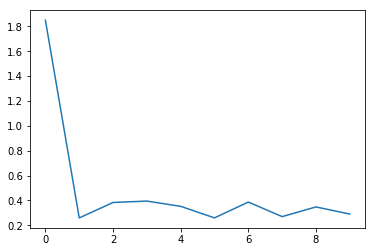

Accuracy on test-set: 91.5%


In [16]:
cost=train(1000)
plot_graph(cost)
print_accuracy()

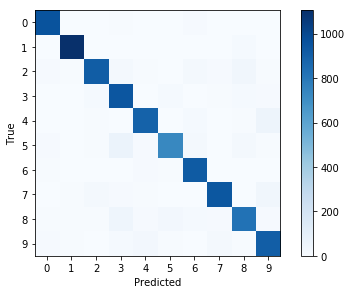

In [17]:
print_confusion_matrix()